In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

● Perform EDA and all necessary analysis as performed by the author of this article
● Apply KNN and SVM
● Apply Evaluation Metrics that has been used in this paper (See Table 1)

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.shape

(569, 33)

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df = df.drop('Unnamed: 32', axis=1)

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.duplicated().sum()

0

In [11]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [12]:
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 
           'texture_worst' ,'perimeter_worst', 'area_worst', 'smoothness_worst'	,'compactness_worst', 'concavity_worst', 
           'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst']

radius_mean                   Axes(0.125,0.11;0.021648x0.77)
texture_mean               Axes(0.150978,0.11;0.021648x0.77)
perimeter_mean             Axes(0.176955,0.11;0.021648x0.77)
area_mean                  Axes(0.202933,0.11;0.021648x0.77)
smoothness_mean            Axes(0.228911,0.11;0.021648x0.77)
compactness_mean           Axes(0.254888,0.11;0.021648x0.77)
concavity_mean             Axes(0.280866,0.11;0.021648x0.77)
concave points_mean        Axes(0.306844,0.11;0.021648x0.77)
texture_worst              Axes(0.332821,0.11;0.021648x0.77)
perimeter_worst            Axes(0.358799,0.11;0.021648x0.77)
area_worst                 Axes(0.384777,0.11;0.021648x0.77)
smoothness_worst           Axes(0.410754,0.11;0.021648x0.77)
compactness_worst          Axes(0.436732,0.11;0.021648x0.77)
concavity_worst            Axes(0.462709,0.11;0.021648x0.77)
concave points_worst       Axes(0.488687,0.11;0.021648x0.77)
symmetry_worst             Axes(0.514665,0.11;0.021648x0.77)
fractal_dimension_worst 

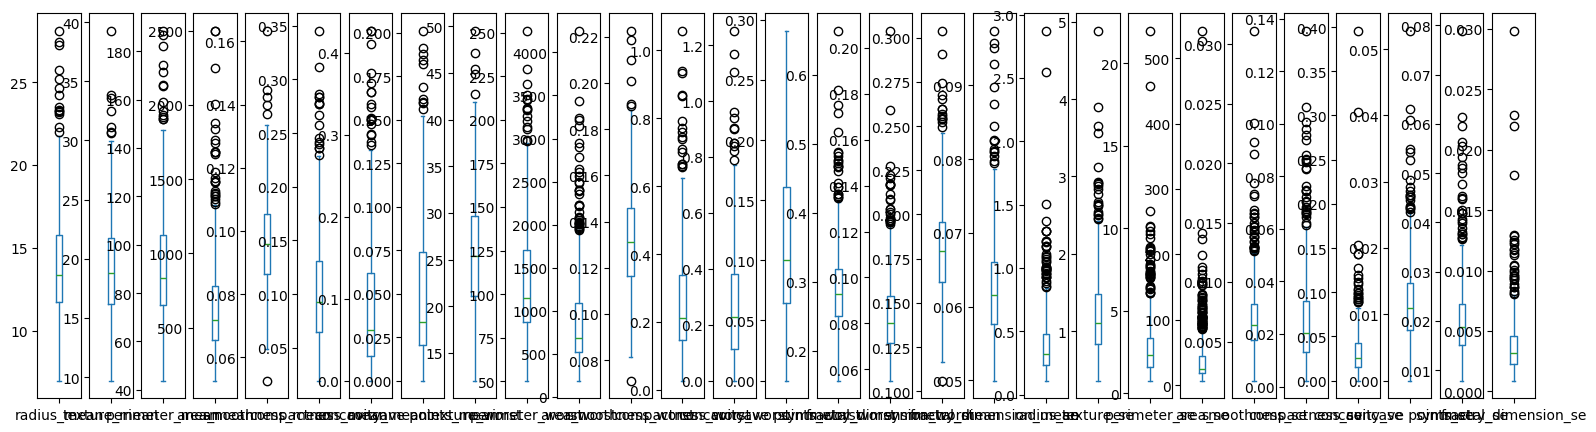

In [13]:
df[columns].plot(kind='box', subplots=True, layout=(1, 30), figsize=(20, 5))

In [14]:
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

radius_mean                   Axes(0.125,0.11;0.021648x0.77)
texture_mean               Axes(0.150978,0.11;0.021648x0.77)
perimeter_mean             Axes(0.176955,0.11;0.021648x0.77)
area_mean                  Axes(0.202933,0.11;0.021648x0.77)
smoothness_mean            Axes(0.228911,0.11;0.021648x0.77)
compactness_mean           Axes(0.254888,0.11;0.021648x0.77)
concavity_mean             Axes(0.280866,0.11;0.021648x0.77)
concave points_mean        Axes(0.306844,0.11;0.021648x0.77)
texture_worst              Axes(0.332821,0.11;0.021648x0.77)
perimeter_worst            Axes(0.358799,0.11;0.021648x0.77)
area_worst                 Axes(0.384777,0.11;0.021648x0.77)
smoothness_worst           Axes(0.410754,0.11;0.021648x0.77)
compactness_worst          Axes(0.436732,0.11;0.021648x0.77)
concavity_worst            Axes(0.462709,0.11;0.021648x0.77)
concave points_worst       Axes(0.488687,0.11;0.021648x0.77)
symmetry_worst             Axes(0.514665,0.11;0.021648x0.77)
fractal_dimension_worst 

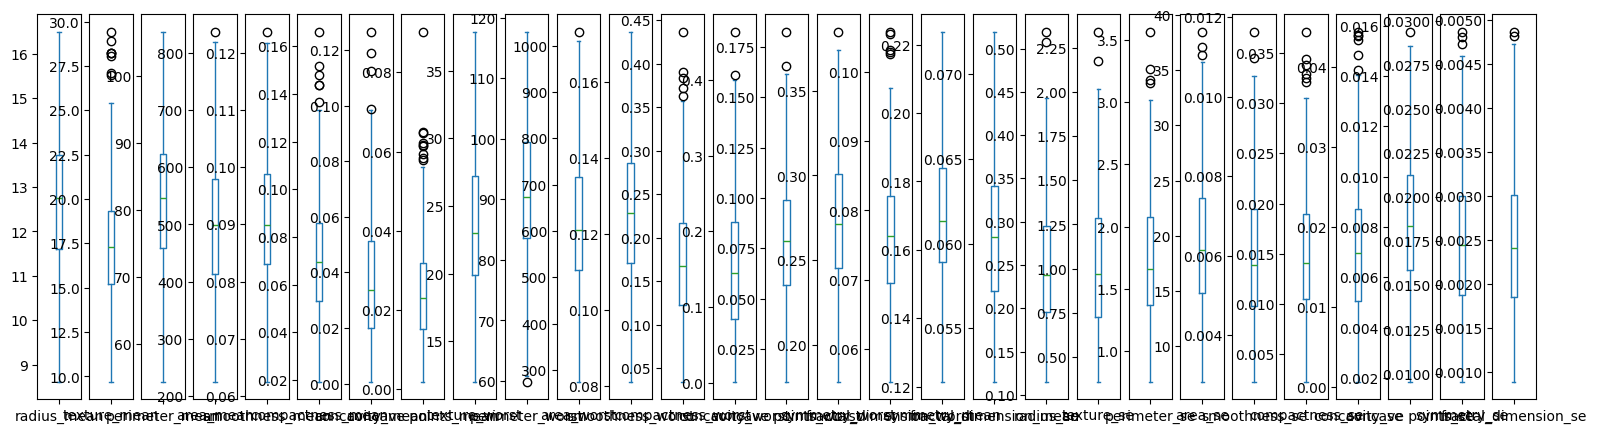

In [15]:
#outliers removed
df[columns].plot(kind='box', subplots=True, layout=(1, 30), figsize=(20, 5))

In [16]:
df.to_csv('cancer.csv', index=False)

In [17]:
df = pd.read_csv("cancer.csv")

In [18]:
df.shape

(248, 32)

In [19]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,855167,M,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,...,15.93,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146


In [20]:
df.drop('id', axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,M,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.020310,0.1784,...,15.93,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,B,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,...,10.93,25.59,69.10,364.2,0.11990,0.09546,0.09350,0.03846,0.2552,0.07920
244,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.008160,0.1976,...,13.03,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626
245,B,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.022570,0.2030,...,12.02,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
246,B,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.014990,0.1539,...,13.87,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484


In [21]:
df['diagnosis'].value_counts()

diagnosis
B    231
M     17
Name: count, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 
        'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
        'compactness_worst', 'concavity_worst', 'concave points_worst', 
        'symmetry_worst', 'fractal_dimension_worst', 'symmetry_mean', 
        'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
        'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
        'concave points_se', 'symmetry_se', 'fractal_dimension_se']]
y = df['diagnosis']

X_resampled, y_resampled = oversample.fit_resample(X, y)

print("Resampled class distribution:\n", y_resampled.value_counts())


Resampled class distribution:
 diagnosis
B    231
M    231
Name: count, dtype: int64


In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
diagnosis_encoded = label_encoder.fit_transform(y_resampled)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, diagnosis_encoded, test_size=0.2, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
model = SVC(C=0.1, kernel= 'linear')
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [27]:
print('Training set score:', model.score(X_train_scaled, y_train))
print('Test set score:', model.score(X_test_scaled, y_test))

Training set score: 0.983739837398374
Test set score: 0.967741935483871


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix\n", confusion_matrix(y_test, y_test_pred))

Accuracy: 0.967741935483871

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.94      1.00      0.97        48

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93


Confusion Matrix
 [[42  3]
 [ 0 48]]


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
model2 = KNeighborsClassifier(n_neighbors=5) 
model2.fit(X_train_scaled, y_train)
y_pred = model2.predict(X_test_scaled)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9139784946236559

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        45
           1       0.86      1.00      0.92        48

    accuracy                           0.91        93
   macro avg       0.93      0.91      0.91        93
weighted avg       0.93      0.91      0.91        93


Confusion Matrix:
 [[37  8]
 [ 0 48]]


Work on the same dataset , and now use this paper as a reference
● Perform all necessary analysis as performed by the author of this article
● Do perform feature selection with the same technique as mentioned by the author
● Generate the results of having various categories of data division as mentioned in Table4
● Perform feature selection on every subset as obtained in Table 2
● Genrate Table 3 and Check whether you are obtaining the same features on the same
division.
● Generate table 6 and 7

In [36]:
df = pd.read_csv("cancer.csv")

In [37]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,855167,M,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,...,15.93,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146


In [38]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 
        'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
        'compactness_worst', 'concavity_worst', 'concave points_worst', 
        'symmetry_worst', 'fractal_dimension_worst', 'symmetry_mean', 
        'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
        'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
        'concave points_se', 'symmetry_se', 'fractal_dimension_se']]
y = df['diagnosis']

X_resampled, y_resampled = oversample.fit_resample(X, y)

print("Resampled class distribution:\n", y_resampled.value_counts())

Resampled class distribution:
 diagnosis
B    231
M    231
Name: count, dtype: int64


In [39]:
model = SVC(C=0.1, kernel='rbf')

def evaluate_model_on_split(X, y, test_size, model):
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, diagnosis_encoded, test_size=test_size, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_test_pred)
    
    return accuracy * 100  

results = {
    "Model": [],
    "50-50 split": [],
    "70-30 split": [],
    "80-20 split": []
}

for i in range(1, 10):
    results["Model"].append(f"# {i}")
    results["50-50 split"].append(evaluate_model_on_split(X_resampled, diagnosis_encoded, test_size=0.5, model=model))
    results["70-30 split"].append(evaluate_model_on_split(X_resampled, diagnosis_encoded, test_size=0.3, model=model))
    results["80-20 split"].append(evaluate_model_on_split(X_resampled, diagnosis_encoded, test_size=0.2, model=model))

results_df = pd.DataFrame(results)
print(results_df)

  Model  50-50 split  70-30 split  80-20 split
0   # 1    94.805195     93.52518    93.548387
1   # 2    94.805195     93.52518    93.548387
2   # 3    94.805195     93.52518    93.548387
3   # 4    94.805195     93.52518    93.548387
4   # 5    94.805195     93.52518    93.548387
5   # 6    94.805195     93.52518    93.548387
6   # 7    94.805195     93.52518    93.548387
7   # 8    94.805195     93.52518    93.548387
8   # 9    94.805195     93.52518    93.548387


In [ ]:
positive_class = df[df['diagnosis'] == 'M']
negative_class = df[df['diagnosis'] == 'B']

features = df.columns.drop('diagnosis')

f_scores = {}
for feature in features:
    positive_mean = positive_class[feature].mean()
    negative_mean = negative_class[feature].mean()
    overall_mean = df[feature].mean()

    numerator = ((positive_mean - overall_mean) ** 2) + ((negative_mean - overall_mean) ** 2)
   
    positive_var = positive_class[feature].var(ddof=1)  
    negative_var = negative_class[feature].var(ddof=1)
    
    n_positive = len(positive_class)
    n_negative = len(negative_class)
    
    denominator = (1 / (n_positive - 1)) * positive_var + (1 / (n_negative - 1)) * negative_var

    f_score = numerator / denominator if denominator != 0 else 0
    f_scores[feature] = f_score

f_scores_df = pd.DataFrame(list(f_scores.items()), columns=['Feature', 'F-Score']).sort_values(by='F-Score', ascending=False)

print(f_scores_df)


                    Feature     F-Score
21             radius_worst  101.636211
23          perimeter_worst  100.073112
24               area_worst   74.910286
27          concavity_worst   73.646911
28     concave points_worst   70.204279
3            perimeter_mean   51.997101
1               radius_mean   43.658721
4                 area_mean   37.122539
7            concavity_mean   31.887250
26        compactness_worst   26.326176
8       concave points_mean   23.483456
22            texture_worst   21.332795
2              texture_mean   15.076982
25         smoothness_worst   13.267205
19              symmetry_se   13.089274
14                  area_se   11.408405
6          compactness_mean   11.150255
30  fractal_dimension_worst    9.263664
29           symmetry_worst    7.469565
17             concavity_se    6.736284
13             perimeter_se    3.886998
11                radius_se    3.770559
18        concave points_se    3.500856
5           smoothness_mean    2.997006


In [45]:
f_scores_df = pd.DataFrame(list(f_scores.items()), columns=['Feature', 'F-Score']).sort_values(by='F-Score', ascending=False)

models = list(range(1, 10)) 

selected_features = {}
for model_num in models:
    top_features = f_scores_df['Feature'].head(model_num).tolist()
    selected_features[f"Model #{model_num}"] = top_features

table_3_df = pd.DataFrame({
    "Model": [f"#{i}" for i in models],
    "No. of selected features": models,
    "Features": [', '.join(selected_features[f"Model #{i}"]) for i in models]
})

print("Table 3: The nine feature subsets based on F-score")
print(table_3_df)

Table 3: The nine feature subsets based on F-score
  Model  No. of selected features  \
0    #1                         1   
1    #2                         2   
2    #3                         3   
3    #4                         4   
4    #5                         5   
5    #6                         6   
6    #7                         7   
7    #8                         8   
8    #9                         9   

                                            Features  
0                                       radius_worst  
1                      radius_worst, perimeter_worst  
2          radius_worst, perimeter_worst, area_worst  
3  radius_worst, perimeter_worst, area_worst, con...  
4  radius_worst, perimeter_worst, area_worst, con...  
5  radius_worst, perimeter_worst, area_worst, con...  
6  radius_worst, perimeter_worst, area_worst, con...  
7  radius_worst, perimeter_worst, area_worst, con...  
8  radius_worst, perimeter_worst, area_worst, con...  


In [46]:
splits = [0.5, 0.3, 0.2] 

top_5_features = f_scores_df['Feature'].head(5).tolist()
X = df[top_5_features]
y = df['diagnosis']

results = []

for split in splits:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(C=0.1, kernel='linear')
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

In [47]:

cm = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn) * 100  
specificity = tn / (tn + fp) * 100  
ppv = tp / (tp + fp) * 100 
npv = tn / (tn + fn) * 100

results.append({
    "Training-Test Split": f"{int((1 - split) * 100)}-{int(split * 100)}",
    "Sensitivity (%)": round(sensitivity, 2),
    "Specificity (%)": round(specificity, 2),
    "PPV (%)": round(ppv, 2),
    "NPV (%)": round(npv, 2)
})


C:\Users\mujta\AppData\Local\Temp\ipykernel_12352\2677666919.py:6: RuntimeWarning: invalid value encountered in scalar divide
  ppv = tp / (tp + fp) * 100


In [48]:
confusion_matrices = []

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(C=0.1, kernel='linear')
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
    tn, fp, fn, tp = cm.ravel()

    confusion_matrices.append({
        "Partition": f"{int((1 - split) * 100)}-{int(split * 100)} training-test partition",
        "Benign Predicted Benign": tn,
        "Benign Predicted Malignant": fp,
        "Malignant Predicted Benign": fn,
        "Malignant Predicted Malignant": tp
    })

table_7_df = pd.DataFrame(confusion_matrices)

print("Table 7: Confusion matrices for model #5")
print(table_7_df)


Table 7: Confusion matrices for model #5
                       Partition  Benign Predicted Benign  \
0  50-50 training-test partition                      115   
1  70-30 training-test partition                       70   
2  80-20 training-test partition                       45   

   Benign Predicted Malignant  Malignant Predicted Benign  \
0                           0                           9   
1                           0                           5   
2                           0                           5   

   Malignant Predicted Malignant  
0                              0  
1                              0  
2                              0  


TASK 3:
• Work on the same dataset , with complete EDA and Data Wrangling
• Apply SVM with all the Kernel
• Adjust the SVM Hyper parameter Gamma and C and compare your results with default
parameters

EDA and Data Wrangling was done above

In [49]:
df = pd.read_csv("cancer.csv")

In [50]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,855167,M,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,...,15.93,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146


In [ ]:
oversample = SMOTE()
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 
        'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
        'compactness_worst', 'concavity_worst', 'concave points_worst', 
        'symmetry_worst', 'fractal_dimension_worst', 'symmetry_mean', 
        'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
        'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
        'concave points_se', 'symmetry_se', 'fractal_dimension_se']]
y = df['diagnosis']

X_resampled, y_resampled = oversample.fit_resample(X, y)

print("Resampled class distribution:\n", y_resampled.value_counts())

Resampled class distribution:
 diagnosis
B    231
M    231
Name: count, dtype: int64


In [ ]:
label_encoder = LabelEncoder()
diagnosis_encoded = label_encoder.fit_transform(y_resampled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, diagnosis_encoded, test_size=0.3, random_state=42)

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
C_values = [1, 10, 100]
gamma_values = [0.1, 0.01, 0.001]

In [58]:
for kernel in kernels:
    print(f"\nKernel: {kernel}")
    model = SVC(kernel=kernel)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{kernel} Kernel")
    print(f"accuracy {accuracy_score(y_test, y_pred):.4f}")
    print("report\n", classification_report(y_test, y_pred))

    for C in C_values:
        for gamma in gamma_values:
            model = SVC(kernel=kernel, C=C, gamma=gamma)
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            print(f"\nparameters (C={C}, gamma={gamma}) for {kernel} Kernel")
            print(f"accuracy {accuracy_score(y_test, y_pred):.4f}")
            print("report\n", classification_report(y_test, y_pred))


Kernel: linear

linear Kernel
accuracy 0.9784
report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.95      1.00      0.98        63

    accuracy                           0.98       139
   macro avg       0.98      0.98      0.98       139
weighted avg       0.98      0.98      0.98       139


parameters (C=1, gamma=0.1) for linear Kernel
accuracy 0.9784
report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.95      1.00      0.98        63

    accuracy                           0.98       139
   macro avg       0.98      0.98      0.98       139
weighted avg       0.98      0.98      0.98       139


parameters (C=1, gamma=0.01) for linear Kernel
accuracy 0.9784
report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.95      1.00      

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: Unde